```
python inference/create_embeddings.py --config_file="configs/256_resnet50.yml" GPU_IDS [0] DATASETS.ROOT_DIR '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/11/' TEST.IMS_PER_BATCH 128 OUTPUT_DIR 'outputs11' TEST.ONLY_TEST True MODEL.PRETRAIN_PATH "/mnt/DD3/Centroid-reid/market1501_resnet50_256_128_epoch_120.ckpt"
```

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 
import os 
import shutil
import glob 
%matplotlib inline 

In [233]:
data_paths = []
embedings = [] 
norms = [] 
for folder_path in ['/home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1','/home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_2']:
    data_path1 = np.load(f'{folder_path}/paths.npy')
    embedings1 = np.load(f'{folder_path}/embeddings.npy')
    norms1 = embedings1/np.linalg.norm(embedings1,keepdims=True,axis=-1)
    data_paths.append(data_path1)
    embedings.append(embedings1)
    norms.append(norms1)
database_embeds = np.concatenate(embedings,0)
database_norms = np.concatenate(norms,0)
database_paths = np.concatenate(data_paths,0)
print(database_embeds.shape)
for j in range(len(norms)):
    print(data_paths[j][0])
    norm = np.mean(norms[j],0)
    norm = norm/np.linalg.norm(norm,axis=-1)
    if not os.path.exists(str(j)):
        os.makedirs(str(j))
    
    with open(str(j)+'/embed.txt','w') as f:
        for t in norm[0]:
            f.write(str(t))
            f.write(' ')

(58, 1, 512)
/home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_184_6.jpg
/home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_2/f2_179_6.jpg


In [260]:
data_path1 = np.load(f'/home/altex/Desktop/PersonRegistorySampleVideos/SharifCameras/24/2024-06-05_19_55_33/cam4_3/sample/py/paths.npy')
embedings1 = np.load(f'/home/altex/Desktop/PersonRegistorySampleVideos/SharifCameras/24/2024-06-05_19_55_33/cam4_3/sample/py//embeddings.npy')
norms1 = embedings1/np.linalg.norm(embedings1,keepdims=True,axis=-1)
print(norms1.shape)

(1, 1, 512)


In [261]:
cpp_embeds1 = [] 
cpp_data_path1 = []
for fpath in glob.glob('/home/altex/Desktop/PersonRegistorySampleVideos/SharifCameras/24/2024-06-05_19_55_33/cam4_3/sample/cpp_pyland/*.txt'):
    cpp_data_path1.append(fpath.replace('.jpg.txt','.jpg'))
    with open(fpath,'r') as f:
        line = f.readline().strip().split(' ')
        emb = np.array([[float(c) for c in line]])
        cpp_embeds1.append(emb)
cpp_embeds1 = np.array(cpp_embeds1)
cpp_norms1 = cpp_embeds1/np.linalg.norm(cpp_embeds1,keepdims=True,axis=-1)
print(cpp_embeds1.shape)
 
    

(1, 1, 512)


In [269]:
1-((norms1*cpp_norms1)).sum()

0.1634691668062498

In [112]:
cpp_embeds1 = [] 
cpp_data_path1 = []
for fpath in glob.glob('/home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_4/*.txt'):
    cpp_data_path1.append(fpath.replace('.jpg.txt','.jpg'))
    with open(fpath,'r') as f:
        line = f.readline().strip().split(' ')
        emb = np.array([[float(c) for c in line]])
        cpp_embeds1.append(emb)
cpp_embeds1 = np.array(cpp_embeds1)
cpp_norms1 = cpp_embeds1/np.linalg.norm(cpp_embeds1,keepdims=True,axis=-1)
print(cpp_embeds1.shape)
 
    

(13, 1, 512)


In [96]:

cpp_embeds = []
cpp_norms = [] 
cpp_data_paths = []
for dp in ['/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_1',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_2',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_3',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_4',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_5',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_6',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_7',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_8',
           '/home/altex/Codes/build-TrafficEngine-Desktop-Debug/data1/faceID1_9']:
    cpp_embeds2 = [] 
    cpp_data_path2 = []
    for fpath in glob.glob(dp+'/*.txt'):
        cpp_data_path2.append(fpath.replace('.jpg.txt','.jpg'))
        with open(fpath,'r') as f:
            line = f.readline().strip().split(' ')
            emb = np.array([[float(c) for c in line]])
            cpp_embeds2.append(emb)
    cpp_embeds2 = np.array(cpp_embeds2)
    cpp_norms2 = cpp_embeds2/np.linalg.norm(cpp_embeds2,keepdims=True,axis=-1)
    cpp_data_paths.append(dp)
    cpp_norms.append(cpp_norms2.mean(0,keepdims=True))
    cpp_embeds.append(cpp_embeds2.mean(0,keepdims=True))
cpp_database_embeds = np.concatenate(cpp_embeds,0)
cpp_database_norms = np.concatenate(cpp_norms,0)
print(cpp_database_norms.shape)
 
    

(9, 1, 512)


In [113]:

targets = cpp_norms1
targets_path = cpp_data_path1
database = cpp_database_norms
data_path = cpp_data_paths
matched = {}
for j in range(len(targets)):
    dist = ((targets[j:j+1]-database)**2).sum(-1)[:,0]
    for k in range(len(dist)):
        # if k==0:
        #     continue
        if(dist[k]<0.8):
            m = data_path[k].split('/')[-1]
            # print(targets_path[j].split('/')[-1]," " ,data_path[k].split('/')[-1], " Distance = ",dist[k])
            if m not in matched.keys():
                matched[m] = 0 
            matched[m] += 1
print("Targets = ",len(targets), " matched = ", matched)

Targets =  13  matched =  {'faceID1_1': 2}


Targets =  200  matched =  {4: 189}


In [ ]:
f = 2
targets = cpp_norms[f]
targets_path = cpp_data_paths[f]
database = cpp_database_norms
data_path = cpp_data_paths

dist = ((targets-database)**2).sum(-1)[:,0]
for k in range(len(dist)):
    print(data_path[k].split('/')[-1], " Distance = ",dist[k])
plt.hist(dist)
plt.show()

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_184_6.jpg
Num matched =  0


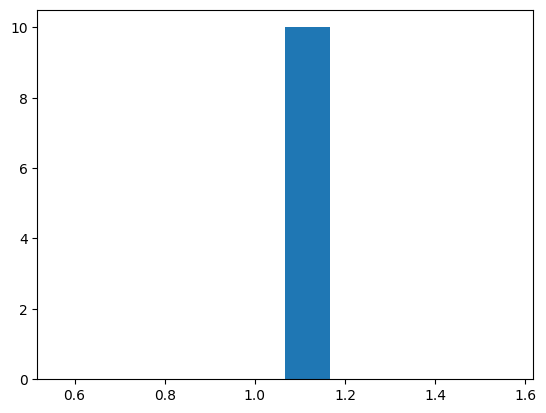

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_233_6.jpg
Num matched =  0


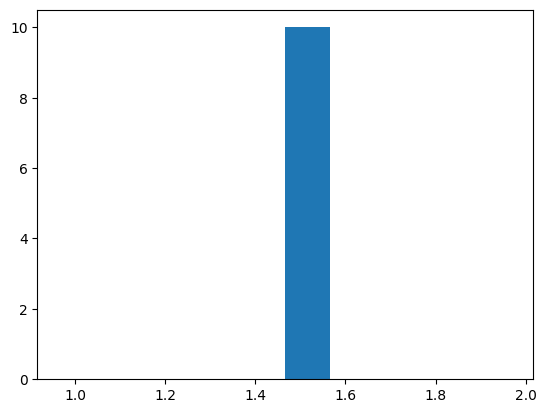

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_217_9.jpg
Num matched =  10


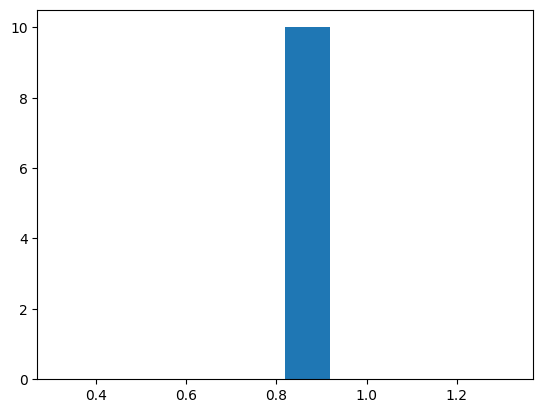

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_100_4.jpg
Num matched =  0


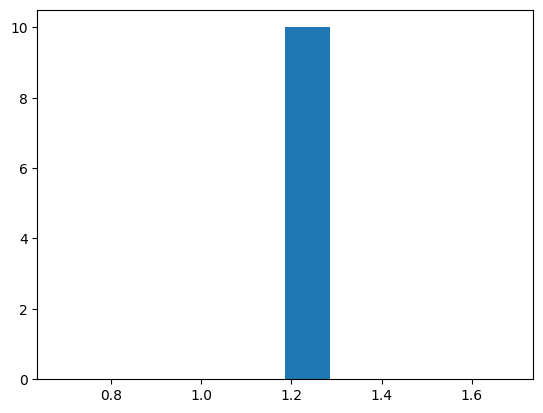

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_119_4.jpg
Num matched =  10


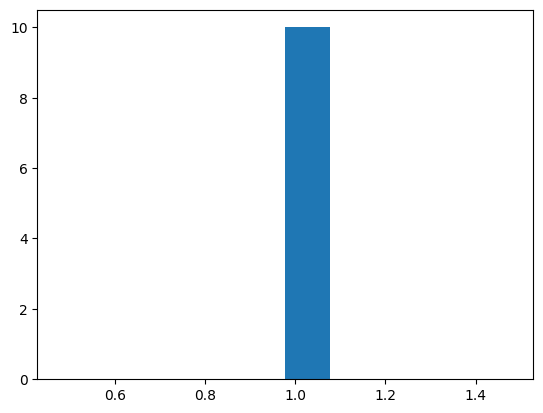

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_99_4.jpg
Num matched =  0


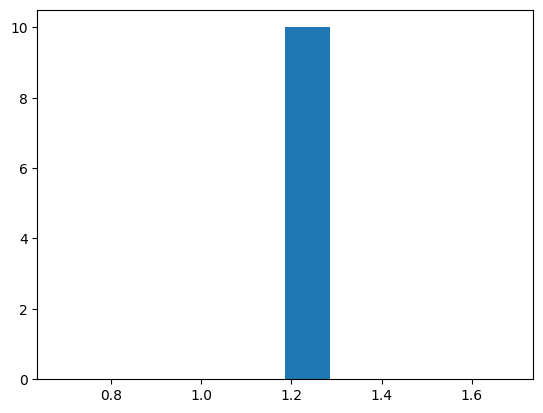

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_221_6.jpg
Num matched =  0


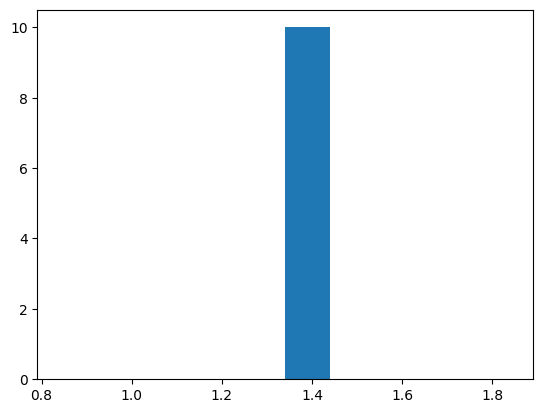

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_109_4.jpg
Num matched =  0


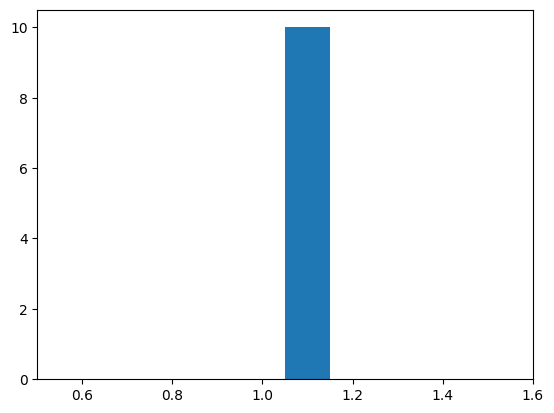

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_111_4.jpg
Num matched =  0


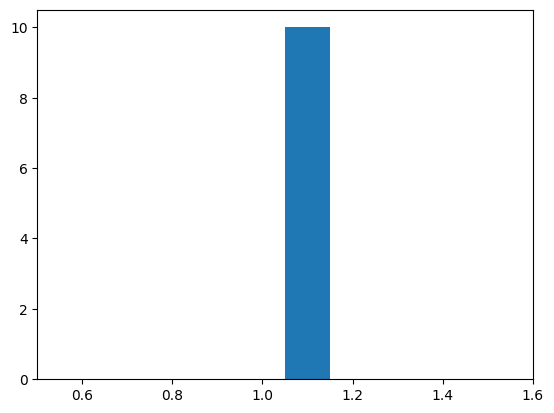

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_117_4.jpg
Num matched =  0


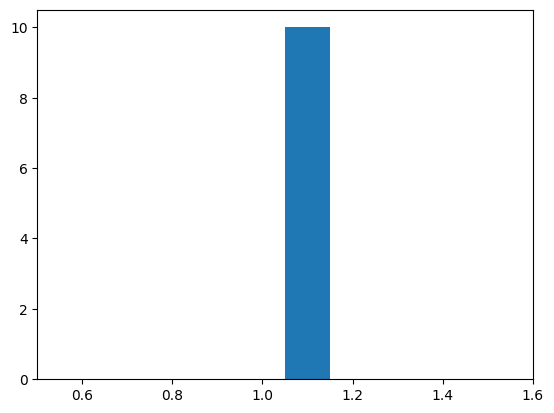

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_103_4.jpg
Num matched =  0


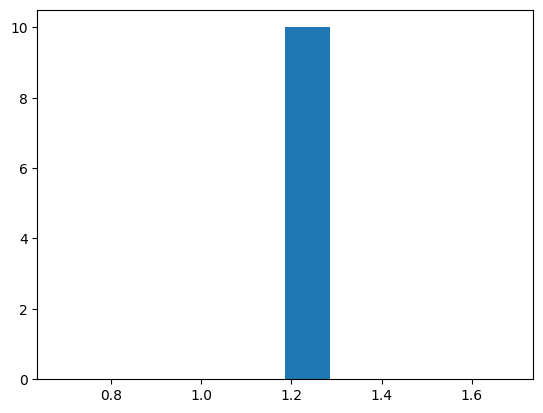

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_105_4.jpg
Num matched =  0


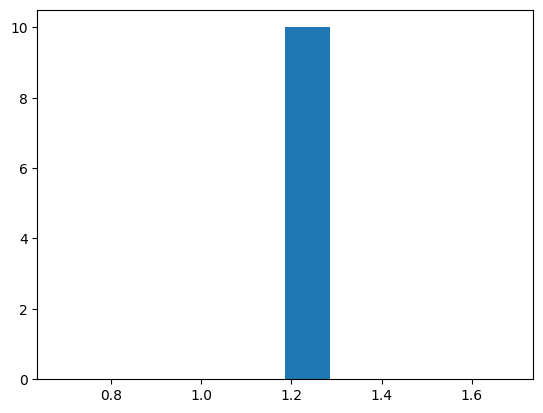

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_187_6.jpg
Num matched =  0


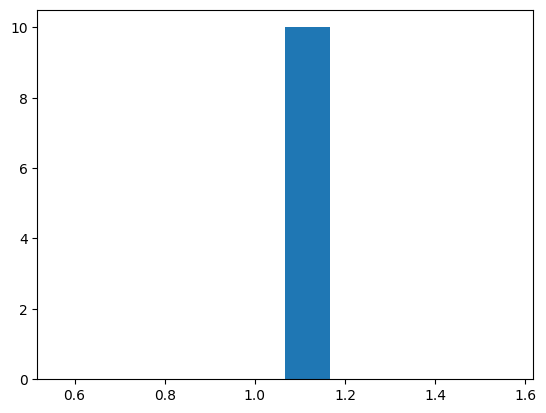

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_185_6.jpg
Num matched =  0


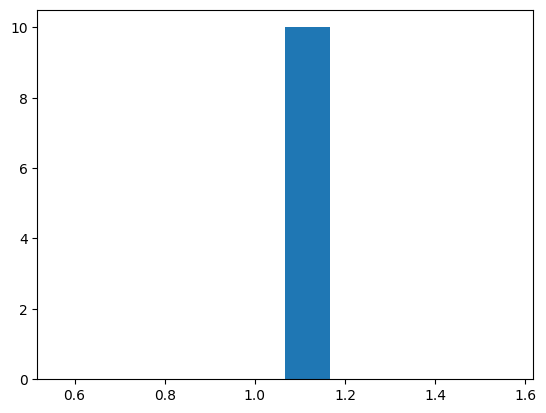

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_102_4.jpg
Num matched =  0


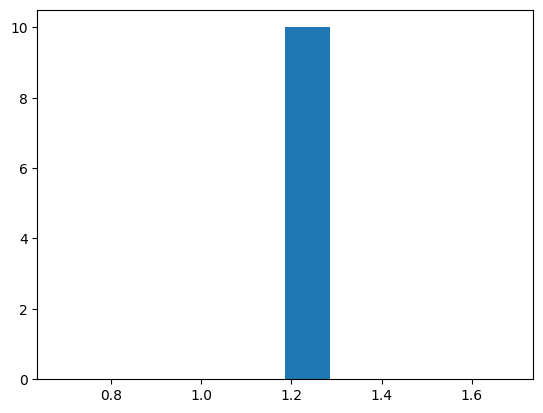

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_228_6.jpg
Num matched =  0


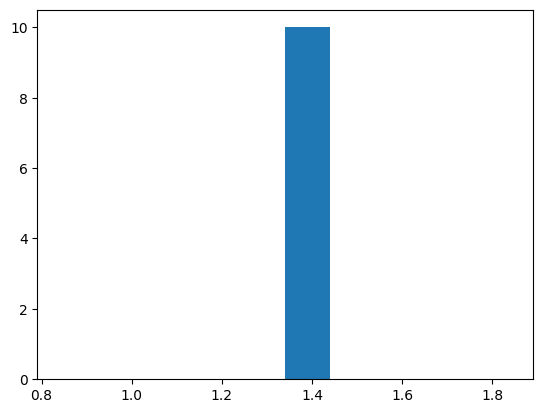

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_215_7.jpg
Num matched =  0


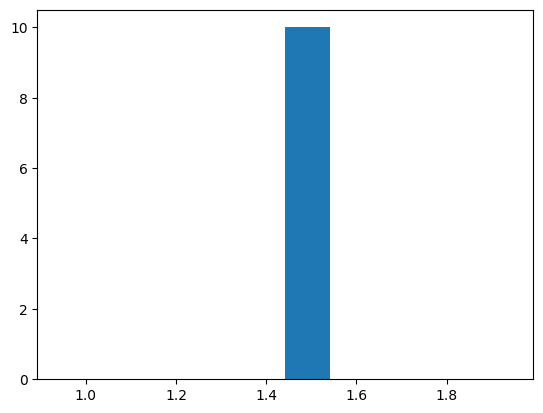

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_110_4.jpg
Num matched =  0


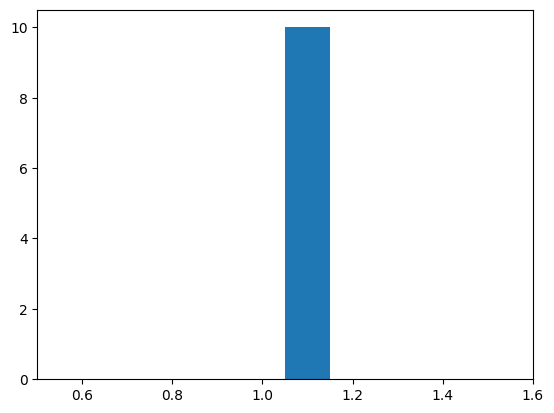

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_223_6.jpg
Num matched =  0


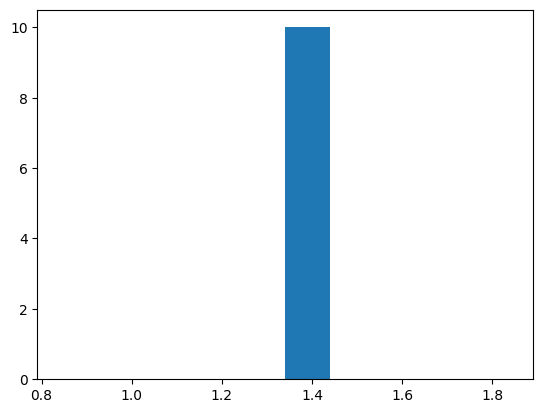

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_232_6.jpg
Num matched =  0


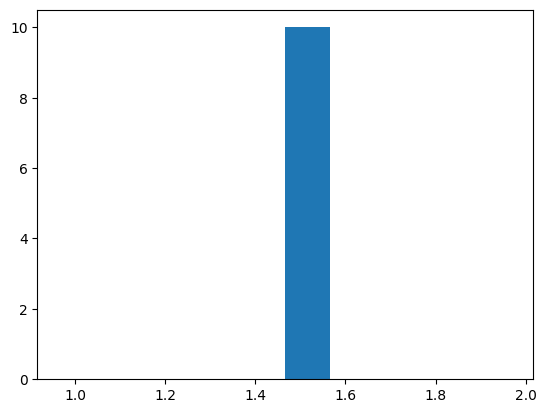

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_186_6.jpg
Num matched =  0


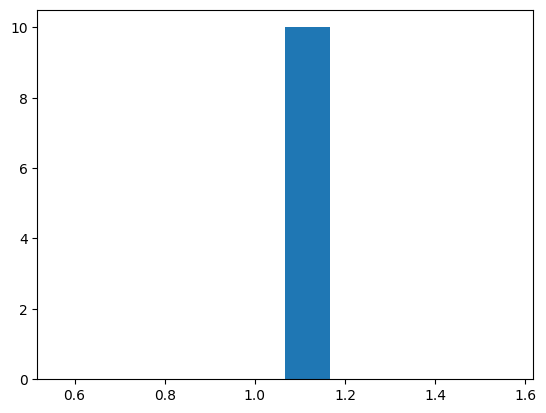

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_114_4.jpg
Num matched =  0


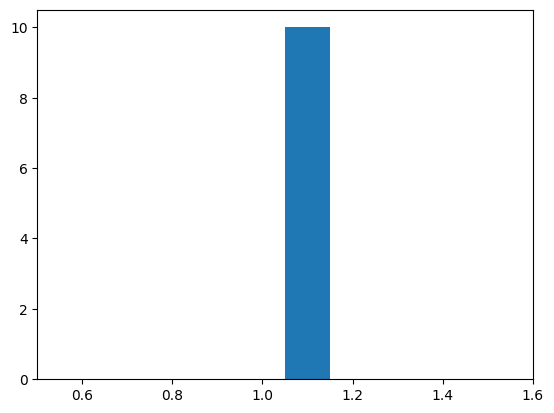

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_227_6.jpg
Num matched =  0


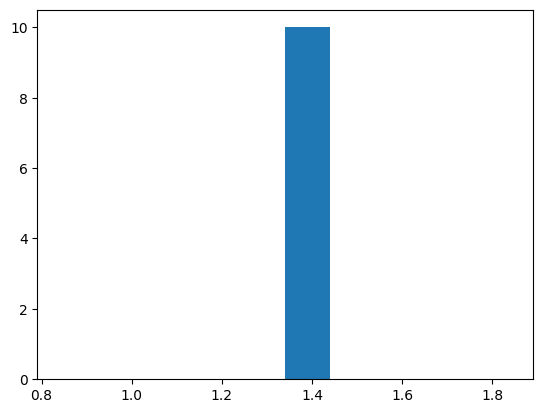

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_106_4.jpg
Num matched =  0


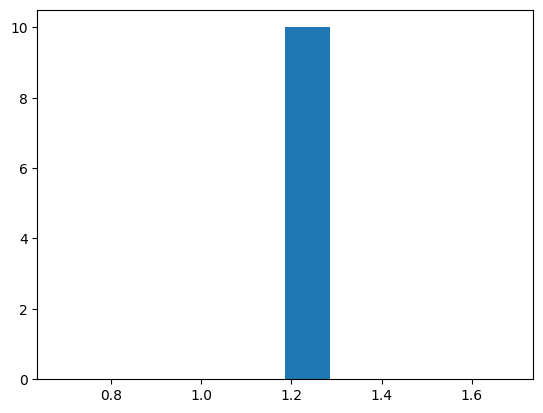

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_230_6.jpg
Num matched =  0


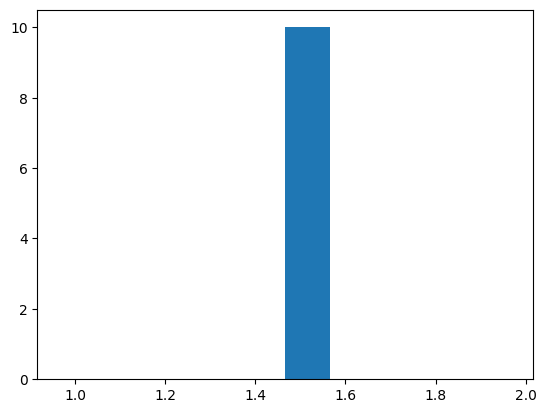

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_112_4.jpg
Num matched =  0


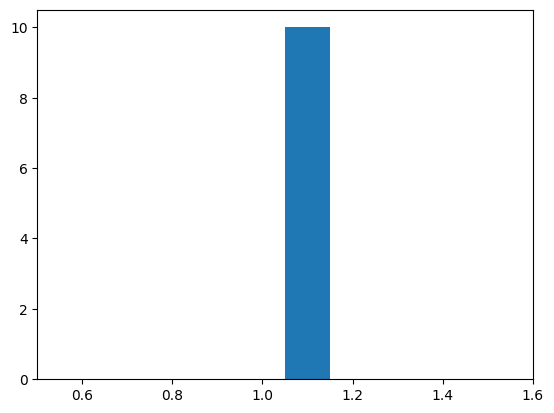

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_222_6.jpg
Num matched =  0


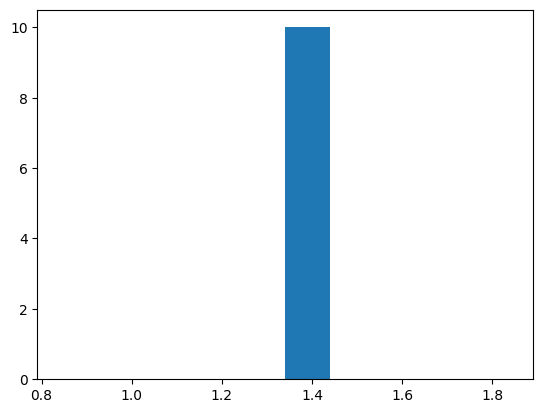

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_212_7.jpg
Num matched =  0


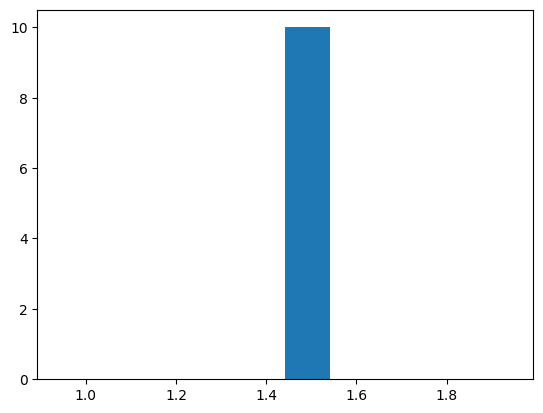

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_214_7.jpg
Num matched =  0


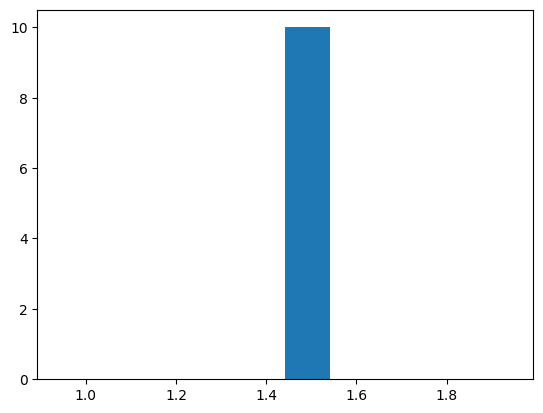

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_219_9.jpg
Num matched =  10


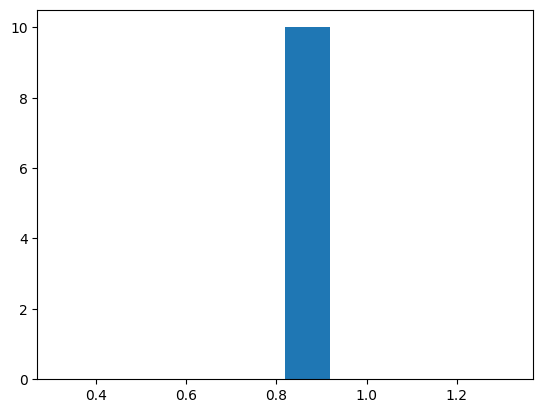

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_113_4.jpg
Num matched =  0


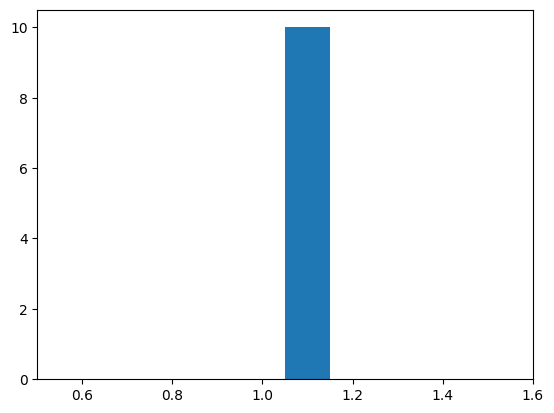

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_226_6.jpg
Num matched =  0


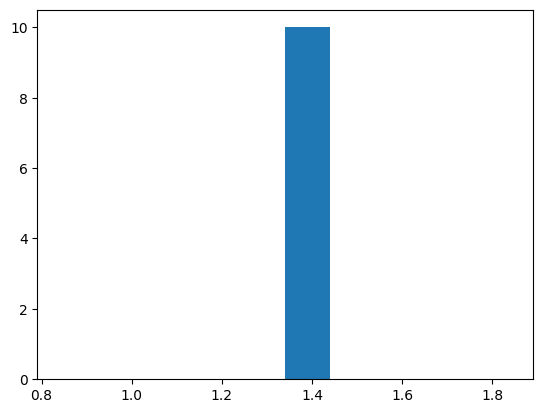

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_107_4.jpg
Num matched =  0


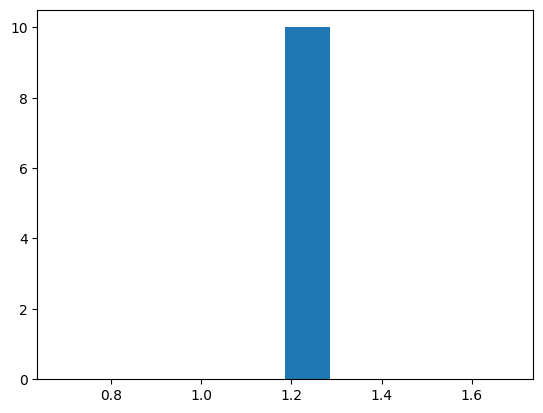

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_229_6.jpg
Num matched =  0


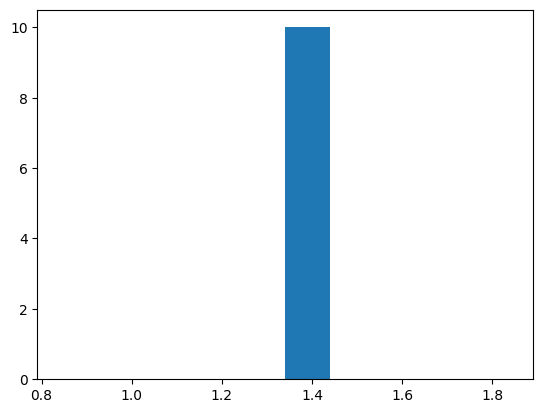

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_182_6.jpg
Num matched =  0


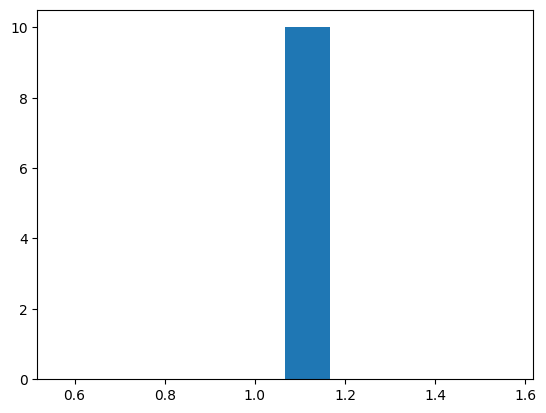

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_225_6.jpg
Num matched =  0


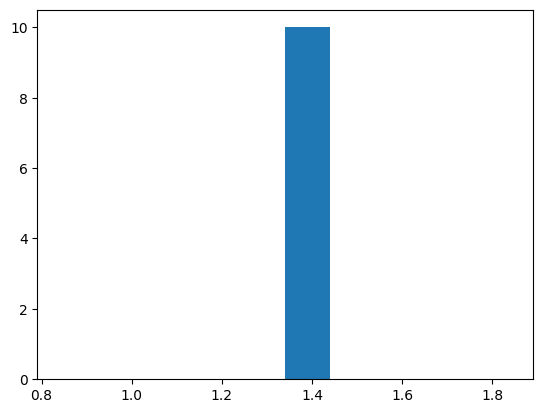

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_224_6.jpg
Num matched =  0


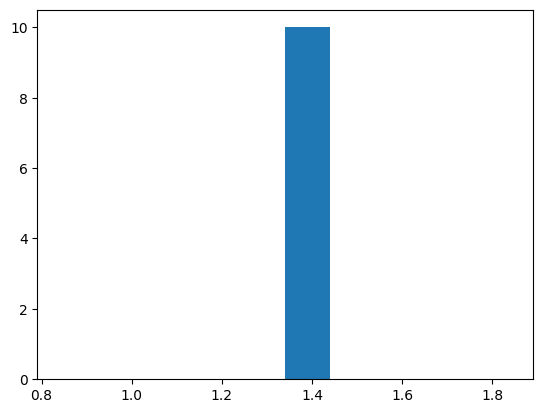

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_98_4.jpg
Num matched =  0


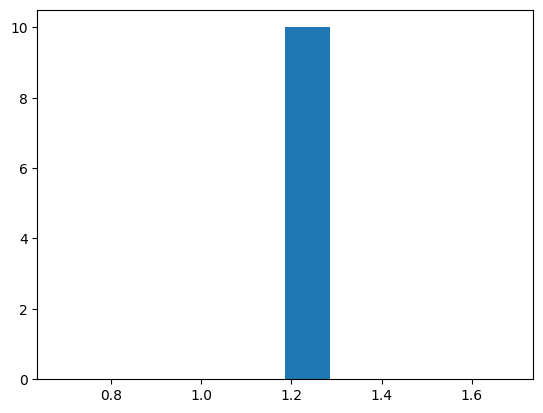

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_104_4.jpg
Num matched =  0


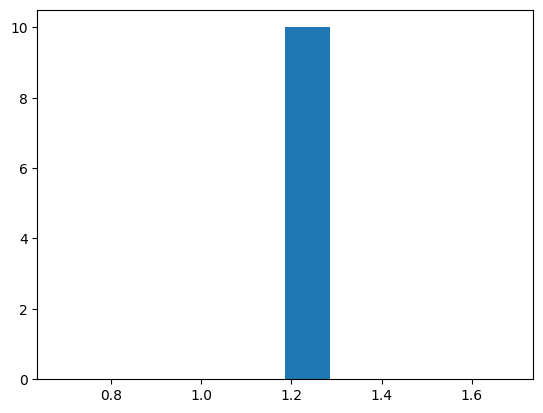

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_116_4.jpg
Num matched =  0


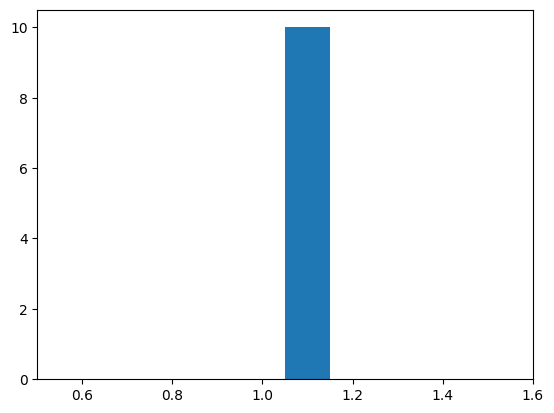

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_118_4.jpg
Num matched =  10


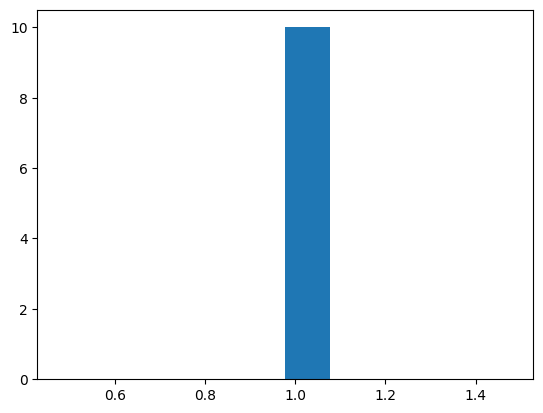

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_108_4.jpg
Num matched =  0


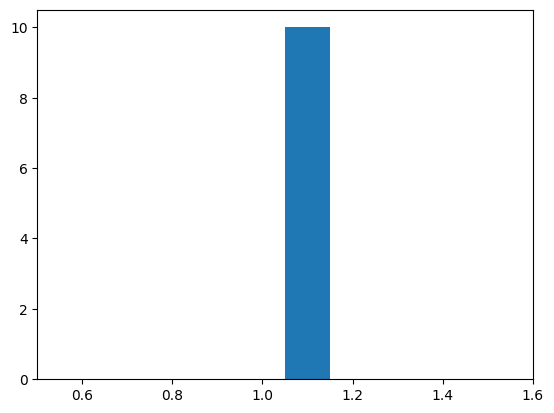

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_218_9.jpg
Num matched =  10


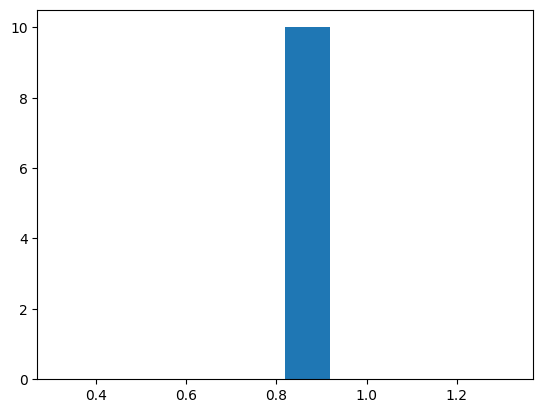

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_101_4.jpg
Num matched =  0


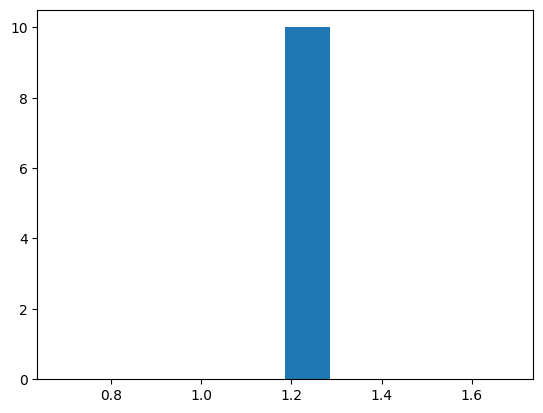

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_213_7.jpg
Num matched =  0


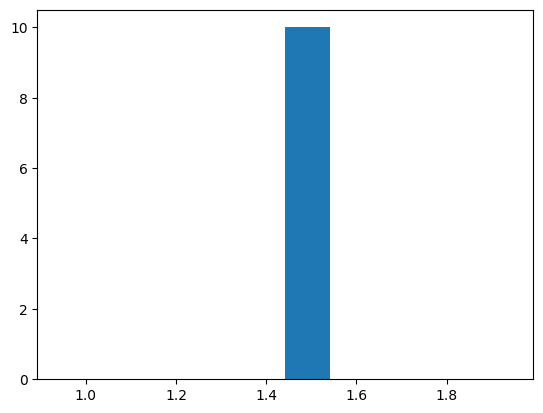

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_183_6.jpg
Num matched =  0


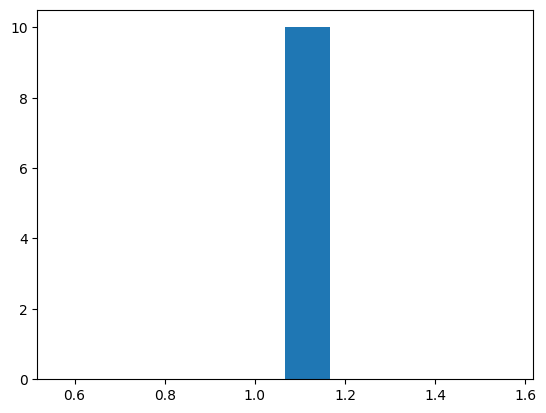

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_231_6.jpg
Num matched =  0


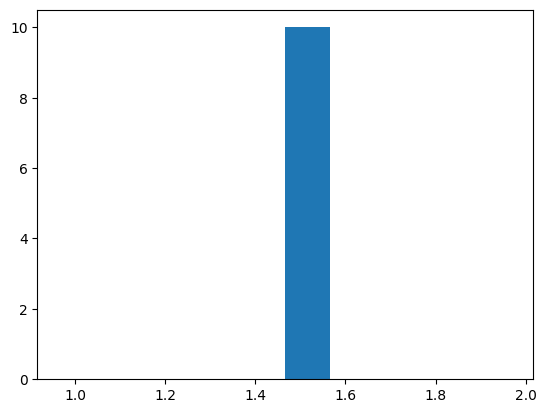

Search for : /home/altex/Codes/build-TrafficEngine-Desktop-Debug/faceID1_1/f2_115_4.jpg
Num matched =  0


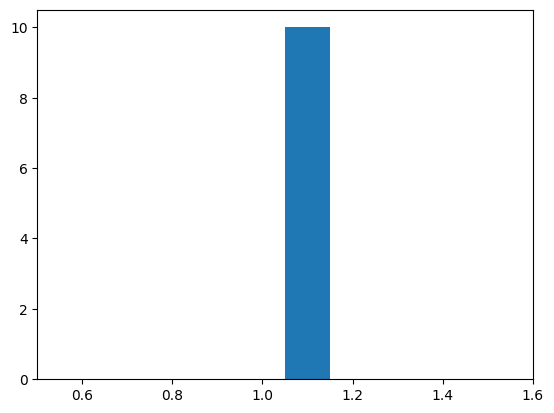

In [42]:
n = 9
f = 0
for n in range(len(norms[0])):
    target = norms[0][n]
    print("Search for :" ,data_paths[0][n])
    database = norms[1]
    data_path = data_paths[1]
    cnt = 0
    if not os.path.exists('data/'+str(n)+"/match/"):
        os.makedirs('data/'+str(n)+"/match/")
    if not os.path.exists('data/'+str(n)+"/unmatch/"):
        os.makedirs('data/'+str(n)+"/unmatch/")
    distances = []
    for j in range(len(database)):
        
        s = ((target-database[j])**2).sum()
        distances.append(s)
        if  s<1.0:
            # print("Found: ", data_path[j], s)
            cnt += 1
            shutil.copyfile(data_path[j], 'data/'+str(n)+"/match/"+data_path[j].split('/')[-1])

        else:
            pass 
            # shutil.copyfile(data_path[j], 'data/'+str(n)+"/unmatch/"+data_path[j].split('/')[-1])
            # print("Not match: ", data_path[j], s)
    print("Num matched = ",cnt)
    plt.hist(distances)
    plt.show()

In [132]:
for n in range(len(norms1)):
    target = norms1[n]
    s = ((target-norms1.mean(0,keepdims=True))**2).sum()
    print("Target = ",data_path1[n].split('/')[-1] ," Distance = ",s)

Target =  0_cam4_3#0000670_P_0.jpg  Distance =  0.39812678
Target =  0_cam4_3#0000685_P_0.jpg  Distance =  0.76283944
Target =  0_cam4_3#0000675_P_0.jpg  Distance =  0.43565798
Target =  0_cam4_3#0000715_P_0.jpg  Distance =  0.46867126
Target =  0_cam4_3#0000680_P_0.jpg  Distance =  0.47668013
Target =  0_cam4_3#0000710_P_0.jpg  Distance =  0.52344745


In [133]:
for n in range(len(cpp_norms2)):
    target = cpp_norms2[n]
    s = ((target-cpp_norms2.mean(0,keepdims=True))**2).sum()
    print("Target = ",cpp_data_path2[n].split('/')[-1] ," Distance = ",s)

Target =  aligned_8_1.jpg  Distance =  0.7055976681289651
Target =  aligned_4_1.jpg  Distance =  0.6845632435010822
Target =  aligned_1_1.jpg  Distance =  0.6258503867319505
Target =  aligned_5_1.jpg  Distance =  0.6336751788939199
Target =  aligned_10_1.jpg  Distance =  0.6079891554563464
Target =  aligned_9_1.jpg  Distance =  0.6415728231090392
Target =  aligned_6_1.jpg  Distance =  0.5100466892338323
Target =  aligned_7_1.jpg  Distance =  0.588876194141819
Target =  aligned_11_1.jpg  Distance =  0.5862584724107506
Target =  aligned_3_1.jpg  Distance =  0.6711669400984122


In [ ]:
data_path = np.load('/home/altex/Codes/centroids-reid/outputs_samples/paths.npy')
embedings = np.load('/home/altex/Codes/centroids-reid/outputs_samples/embeddings.npy')
norms = embedings/np.linalg.norm(embedings,keepdims=True,axis=-1)

In [ ]:
cpp_embeds = [] 
with open('/home/altex/Desktop/samples/black.jpg.txt','r') as f:
    line = f.readline().strip().split(' ')
    cpp_embeds = np.array([[float(c) for c in line]])
    print(cpp_embeds.shape)
 
    

In [ ]:
np.sum(embedings - cpp_embeds)

In [ ]:
norms1.shape

In [ ]:
(cpp_norms1-norms1).sum()

In [110]:
import cv2 
cpp_img = cv2.imread('/home/altex/Codes/DeepInference/NNLibs/build-examples-Desktop-Debug/resized.jpg')
py_img = cv2.imread('/home/altex/Codes/FaceRecognition_Detection/InsightFace_Pytorch/resized.jpg')

In [111]:
cpp_img[:5,:5,0]

array([[152, 101, 125,  85, 156],
       [134, 120, 131, 140,  64],
       [145, 109, 139, 191,  12],
       [197, 176, 195, 175, 134],
       [162, 222, 180,  80, 162]], dtype=uint8)

In [112]:
py_img[:5,:5,0]

array([[152, 101, 125,  85, 156],
       [134, 120, 131, 140,  64],
       [145, 109, 139, 191,  12],
       [197, 176, 195, 175, 134],
       [162, 222, 180,  80, 162]], dtype=uint8)

In [113]:
np.abs(cpp_img-py_img).sum()

0

In [100]:
import torch 
import onnx
from mtcnn_pytorch.src.get_nets import PNet, RNet, ONet
import cv2 
from matplotlib import pyplot as plt 
model = ONet()



(99, 98, 3)


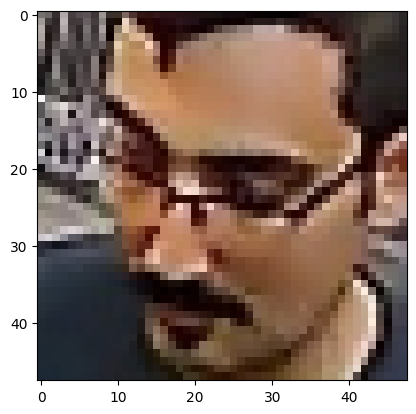

In [227]:
img = cv2.imread('/home/altex/Codes/DeepInference/NNLibs/build-examples-Desktop-Debug/aligned_1_0.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
shape0 = img.shape
print(img.shape)
img = cv2.resize(img,(48,48),interpolation=cv2.INTER_LINEAR)
plt.imshow(img)

In [228]:
x = torch.from_numpy(img).to(torch.float32)
x = (x - 127.5)*0.0078125
x = x.permute((2,0,1)).unsqueeze(0)
print(x.shape)

torch.Size([1, 3, 48, 48])


In [229]:
output = model(x)
landmarks = output[0].cpu().data.numpy()  # shape [n_boxes, 10]
offsets = output[1].cpu().data.numpy()  # shape [n_boxes, 4]
probs = output[2].cpu().data.numpy()  # shape [n_boxes, 2]

In [230]:
land_marks = [[landmarks[0][j]*48,landmarks[0][j+5]*48] for j in range(5) ] 
print(land_marks)

[[13.729650020599365, 19.93677806854248], [27.50416088104248, 23.988347053527832], [17.251665115356445, 33.12204837799072], [12.872072696685791, 38.11160087585449], [28.402999877929688, 40.28206443786621]]


In [231]:
for pt in land_marks:
    x = int(pt[0])
    y = int(pt[1])
    print(f"{x*shape0[1]/48+158},{y*shape0[1]/48+45}")
    cv2.circle(img,(x,y),2,(0,0,255),1)

184.54166666666666,83.79166666666666
213.125,91.95833333333334
192.70833333333334,112.375
182.5,122.58333333333333
215.16666666666666,126.66666666666667


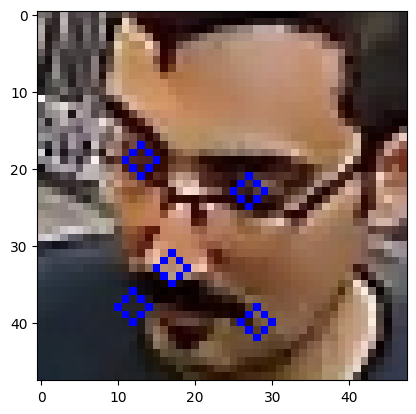

In [232]:
plt.imshow(img)